### Imports

# Michaelis-Menten

In [12]:
import sys
import os
import numpy
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../../')))
import gillespy2

### Model Instantiation

Model must include rates, species, and reactions

In [13]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [14]:
model = MichaelisMenten()


### Run Model and plot
Run the model by calling the run function on the model and select algorithm via 'algorithm' keyword argument.

### ODE Simulation

In [15]:
results = model.run(algorithm = "ODE")

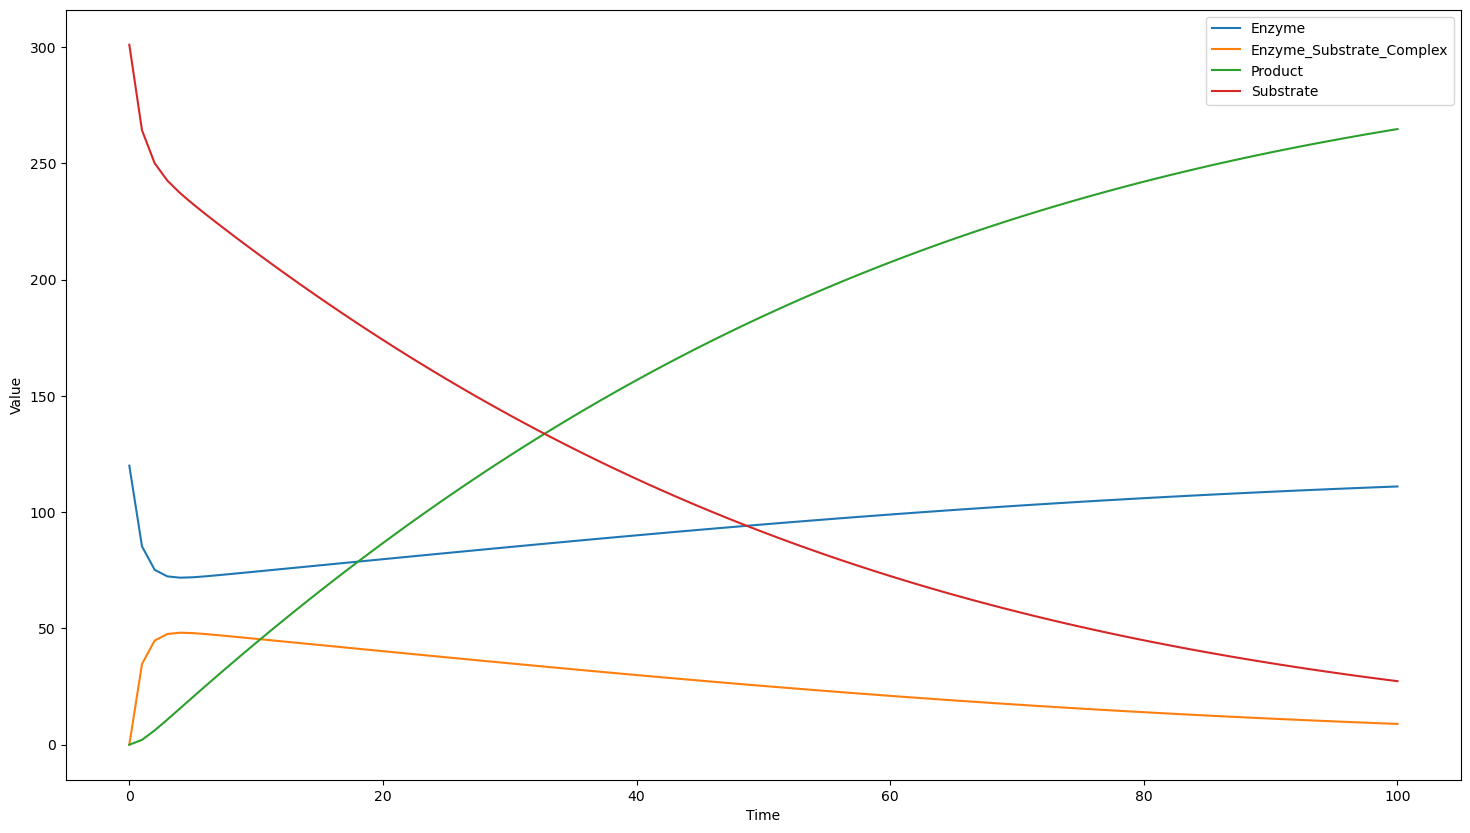

In [16]:
results.plot()

###  Tau Hybrid Simulation

In [17]:
results = model.run(algorithm="Tau-Hybrid")

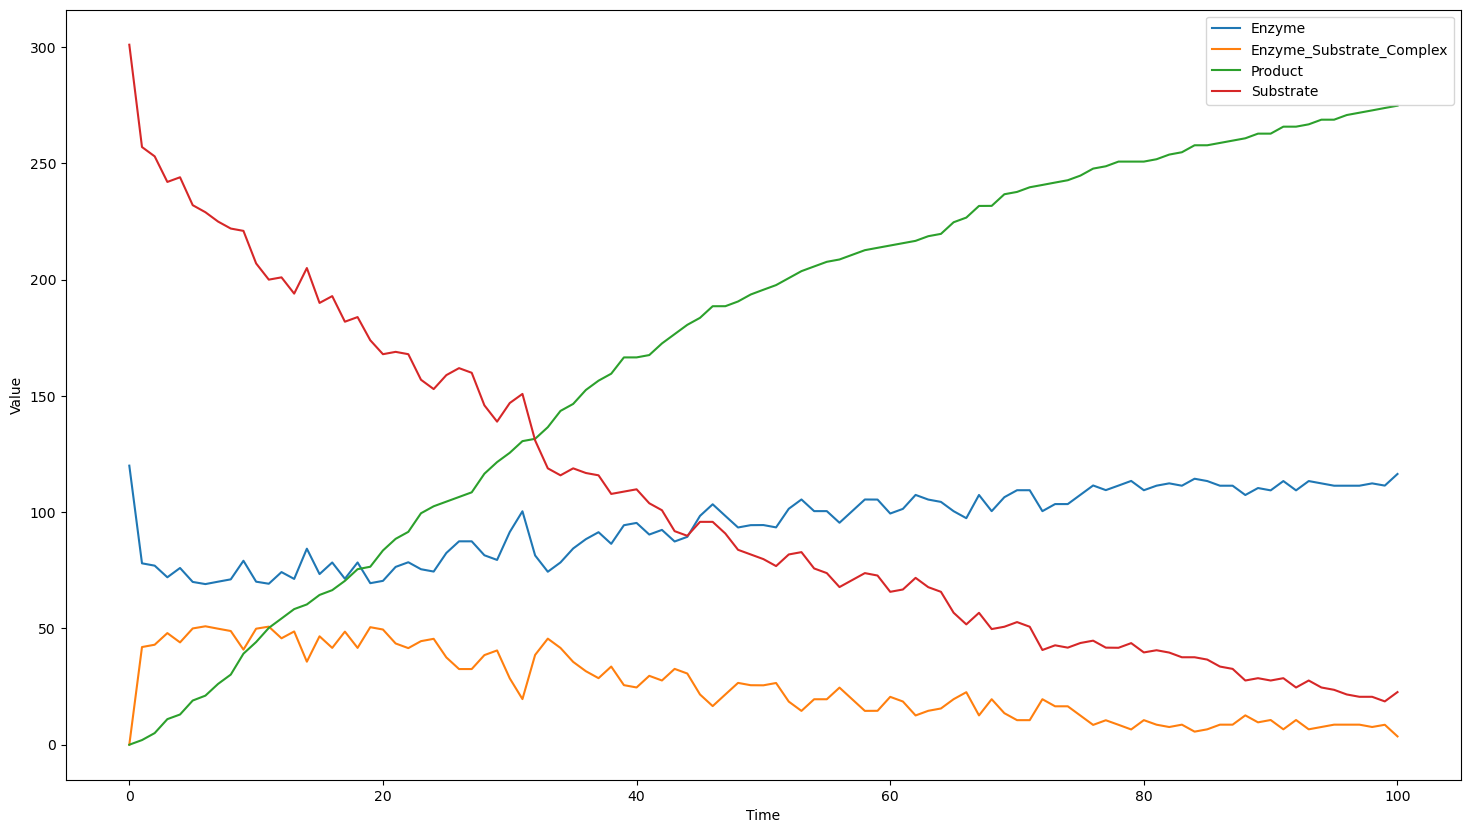

In [18]:
results.plot()

###  Tau Leaping Simulation

In [19]:
results = model.run(algorithm="Tau-Leaping")

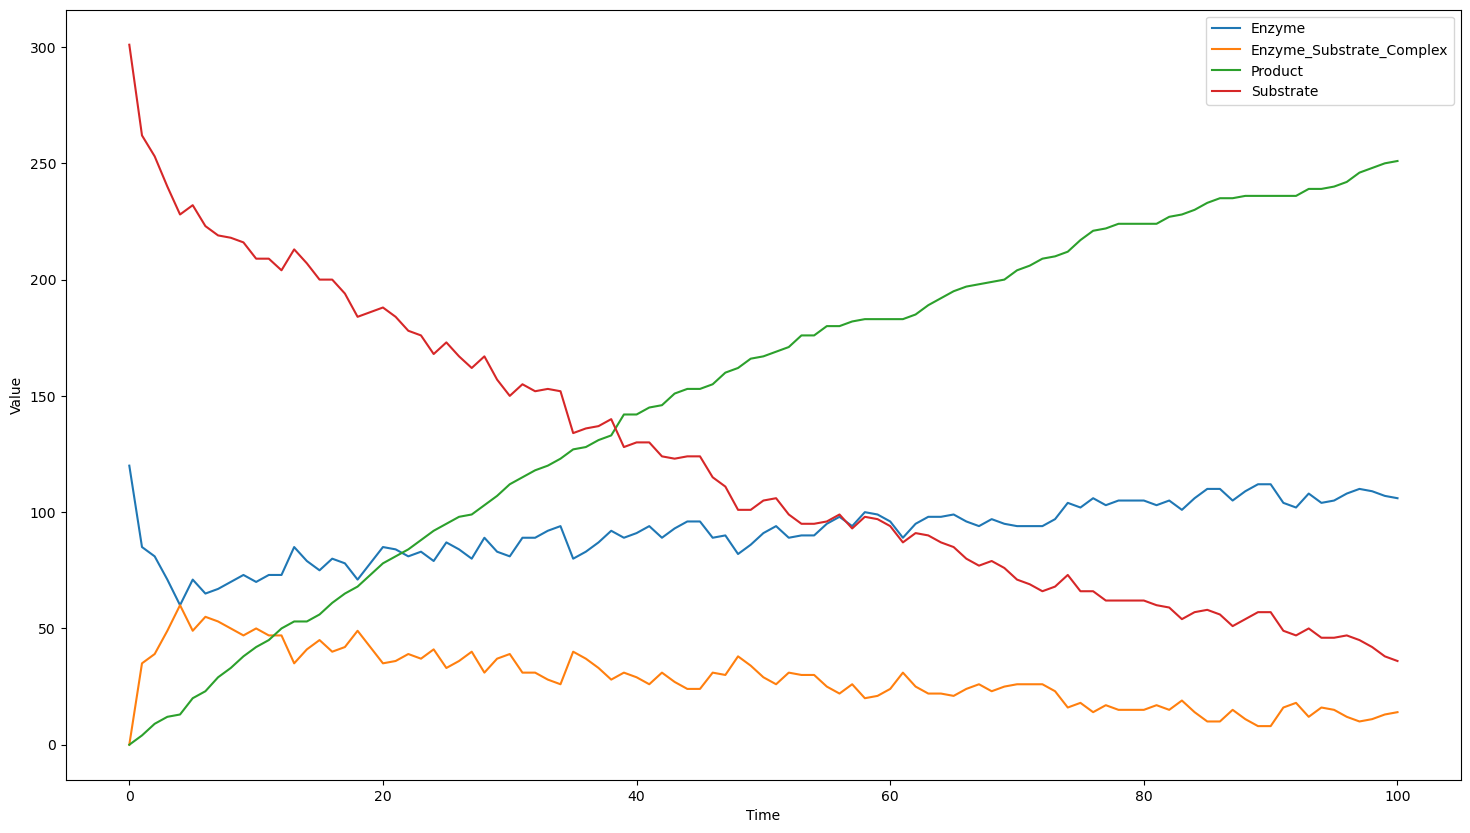

In [20]:
results.plot()

### SSA Simulation

In [21]:
results = model.run(algorithm = "SSA")

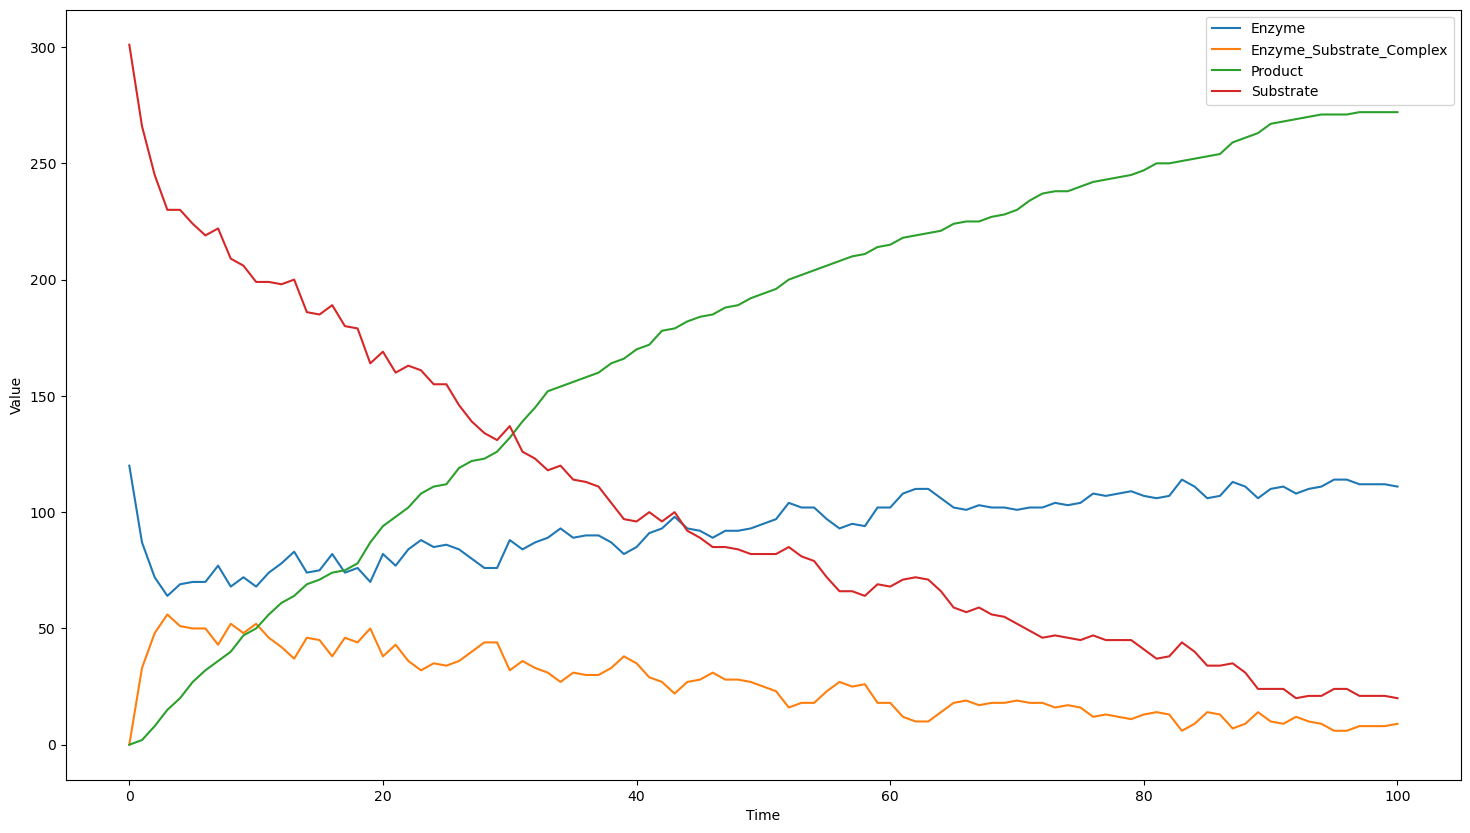

In [22]:
results.plot()